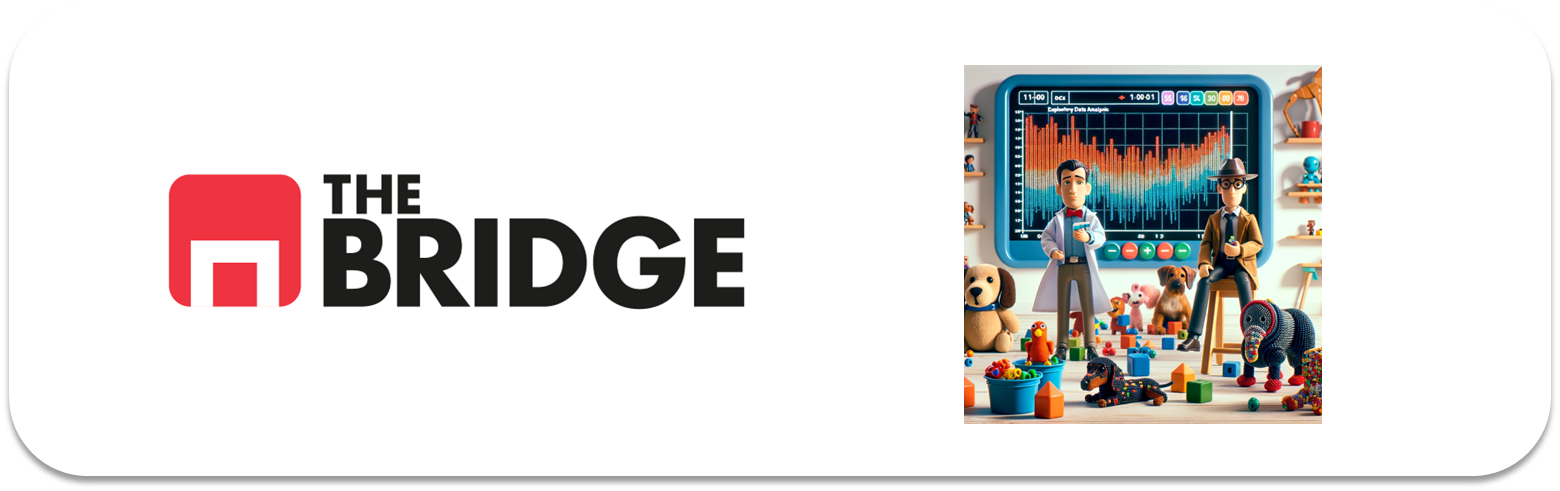

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#from bootcampviztools import

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic= pd.read_csv("./data/titanic.csv")
budf_titanic= df_titanic.copy()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [5]:
# Eliminar las columnas
columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
df_titanic_ajust = df_titanic.drop(columns=columnas_a_eliminar)

# Mostrar información del DataFrame actualizado. En age sigue habiendo nulos
print(df_titanic_ajust.info())

# Primeras líneas
df_titanic_ajust.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB
None


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
# Suma las columnas "parch" y "sibsp"
df_titanic_ajust['family_members'] = df_titanic_ajust['parch'] + df_titanic_ajust['sibsp']

# Elimina las columnas "parch" y "sibsp"
columnas_a_eliminar = ["parch", "sibsp"]
df_titanic_ajust = df_titanic_ajust.drop(columns=columnas_a_eliminar)

# Mostrar las primeras filas 
df_titanic_ajust.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
# Moda
moda_embark_town = df_titanic_ajust['embark_town'].mode()[0]
df_titanic_ajust['embark_town'].fillna(moda_embark_town, inplace=True)
df_titanic_ajust.head(3)

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_17304\1428872477.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_ajust['embark_town'].fillna(moda_embark_town, inplace=True)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
media_age = df_titanic_ajust['age'].mean()
df_titanic_ajust['age'].fillna(media_age, inplace=True)
df_titanic_ajust.head(3)

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_17304\3526638306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_ajust['age'].fillna(media_age, inplace=True)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [9]:
# Columnas categoricas y numericas
categoricas=["sex","who", "class", "embark_town","alive"] 
numericas= ["age","fare","adult_male","alone","family_members"]


Frecuencias absolutas de los supervivientes: en términos absolutos sobrevivieron más mujeres


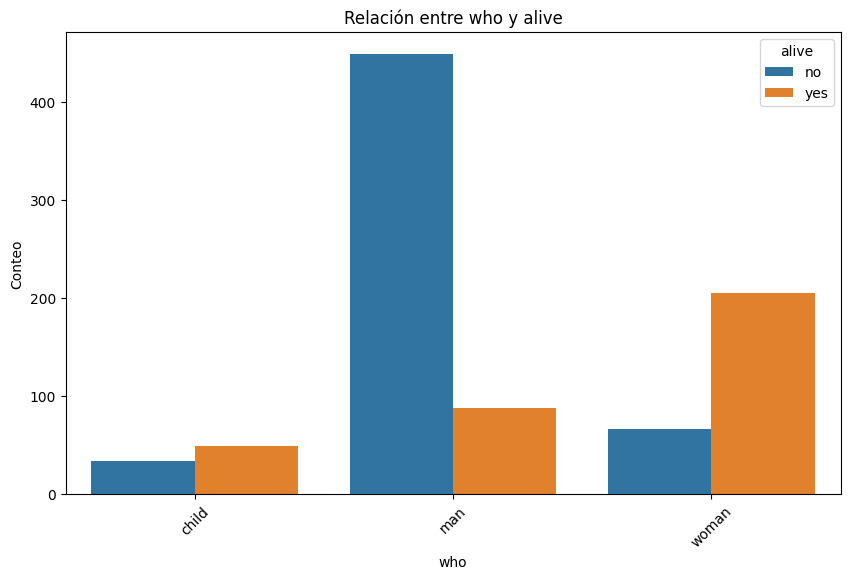

Frecuencias relativas de los supervivientes: en términos relativos sobrevivieron más del 70% de las mujeres


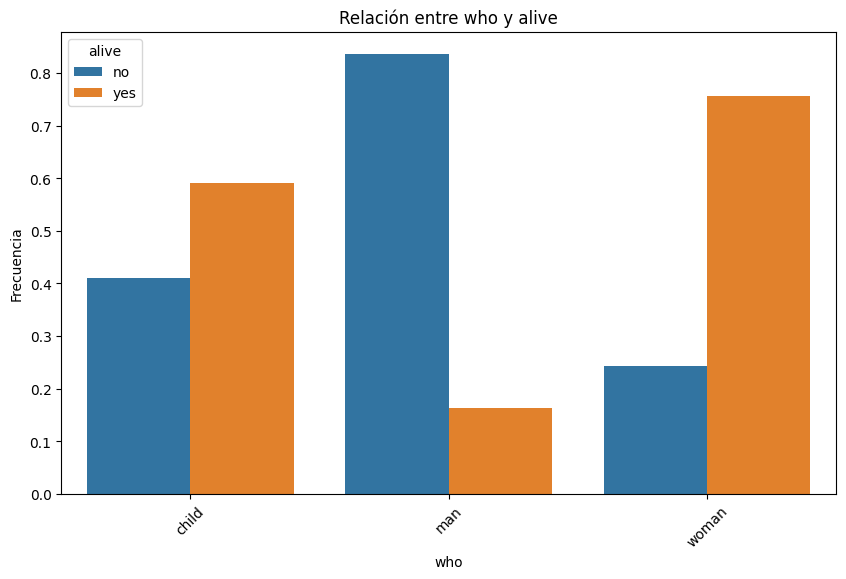

In [12]:
#podemos echar un vistazo con: df_titania.groupbu(["alive","who"])[["age","fare"]].mean().round()


# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?
#Frecuencia absoluta y relativa de supervivientes por "who". Primero vemos frecuencias absolutas y relativas en general
from bootcampviztools import plot_categorical_relationship_fin
print(f"Frecuencias absolutas de los supervivientes: en términos absolutos sobrevivieron más mujeres")
plot_categorical_relationship_fin(df_titanic_ajust, "who", "alive", relative_freq=False, show_values=False, size_group = 5)


print(f"Frecuencias relativas de los supervivientes: en términos relativos sobrevivieron más del 70% de las mujeres")
plot_categorical_relationship_fin(df_titanic_ajust, "who", "alive", relative_freq=True, show_values=False, size_group = 5)


Relación estadística entre la clase y la supervivencia se observa que cuanto más alta es la clase más es la supervivencia y del mismo modo descendente


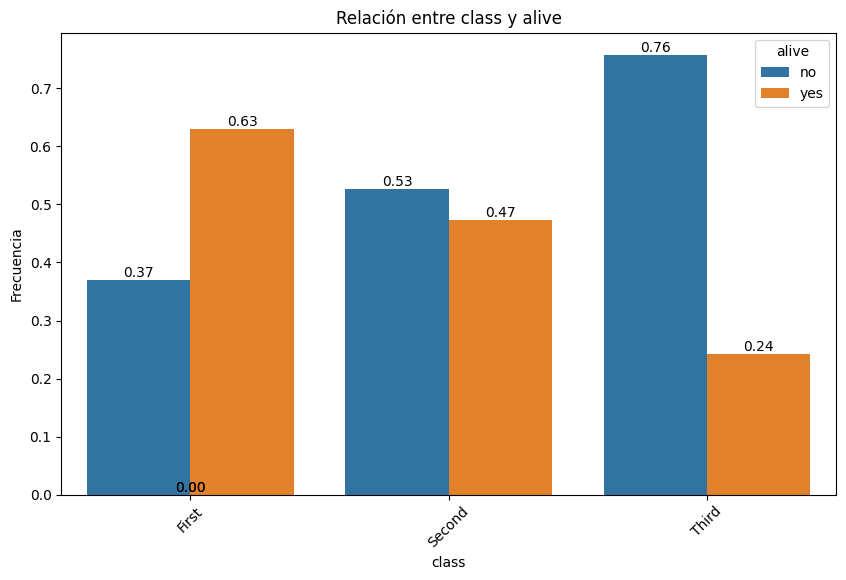

Relación estadística entre who y la supervivencia se observa que la supervivencia fue mayor para mujeres, después niños y en menor medida hombre


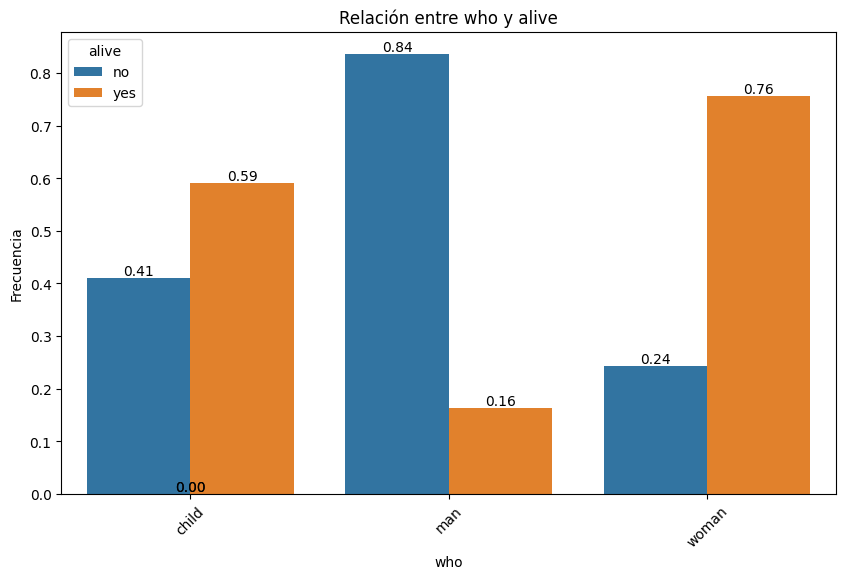

In [11]:
#2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
# Relación estadística entre la clase y la supervivencia. Y entre ser adulto o niño.
from bootcampviztools import plot_categorical_relationship_fin

print(f"Relación estadística entre la clase y la supervivencia se observa que cuanto más alta es la clase más es la supervivencia y del mismo modo descendente")
plot_categorical_relationship_fin(df_titanic_ajust, "class","alive", relative_freq = True, show_values = True)

print(f"Relación estadística entre who y la supervivencia se observa que la supervivencia fue mayor para mujeres, después niños y en menor medida hombre")
plot_categorical_relationship_fin(df_titanic_ajust, "who","alive", relative_freq = True, show_values = True)

Frecuencias absolutas de los supervivientes por clase: en términos absolutos sobrevivieron más de primera, después tercera y segunda


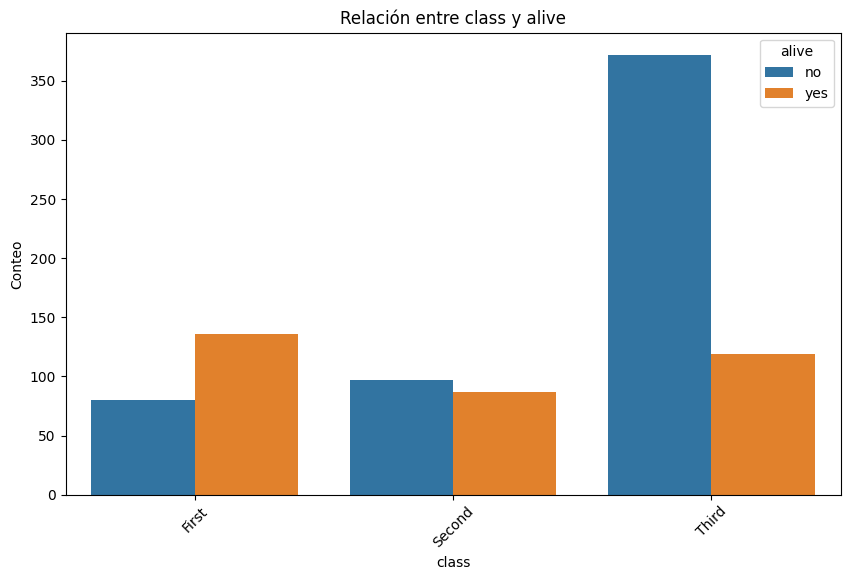

Frecuencias relativas de los supervivientes por clase: en términos relativos sobrevivieron más primera y segunda


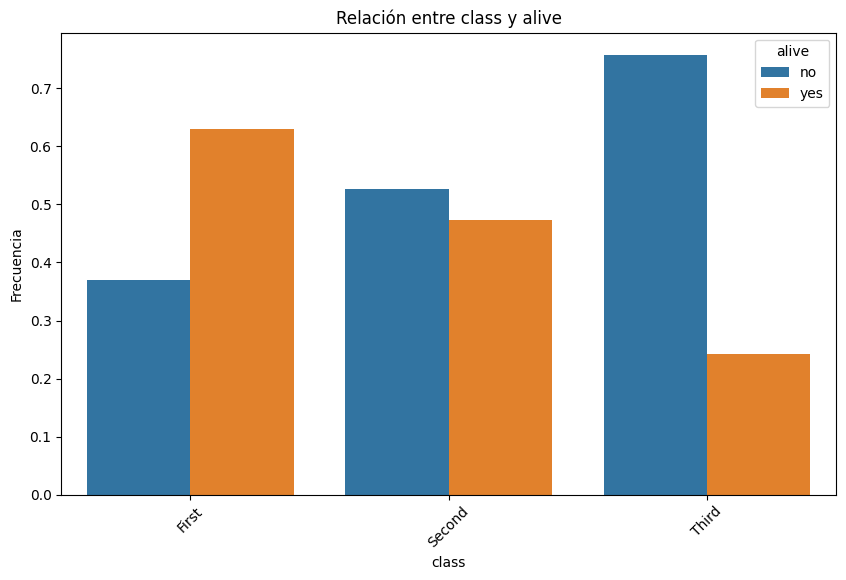

Relación estadística entre la clase y la supervivencia se observa que cuanto más alta es la clase más es la supervivencia y del mismo modo descendente


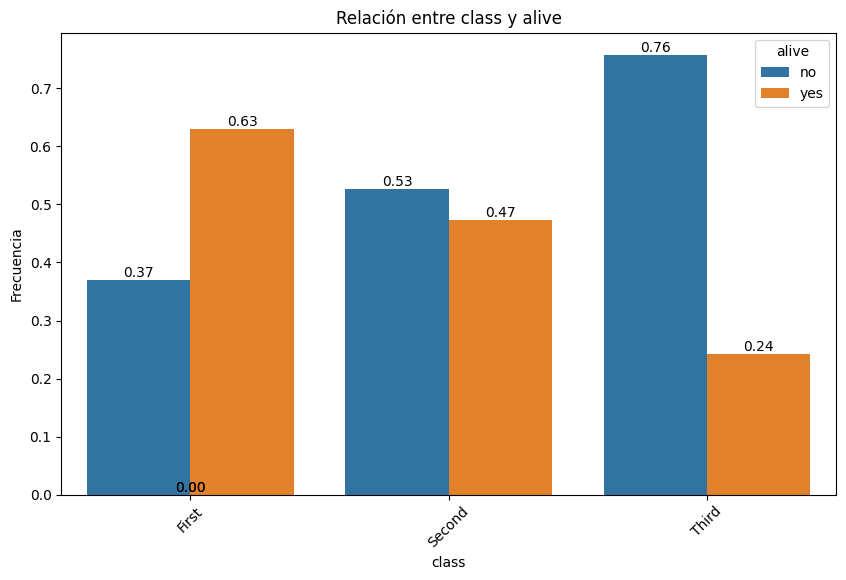

In [11]:
#2.  Frecuencia absoluta y relativa de supervivientes por "clase". 
from bootcampviztools import plot_categorical_relationship_fin

print(f"Frecuencias absolutas de los supervivientes por clase: en términos absolutos sobrevivieron más de primera, después tercera y segunda")
plot_categorical_relationship_fin(df_titanic_ajust, "class", "alive", relative_freq=False, show_values=False, size_group = 5)


print(f"Frecuencias relativas de los supervivientes por clase: en términos relativos sobrevivieron más primera y segunda")
plot_categorical_relationship_fin(df_titanic_ajust, "class", "alive", relative_freq=True, show_values=False, size_group = 5)

print(f"Relación estadística entre la clase y la supervivencia se observa que cuanto más alta es la clase más es la supervivencia y del mismo modo descendente")
plot_categorical_relationship_fin(df_titanic_ajust, "class","alive", relative_freq = True, show_values = True)


Frecuencias absolutas de los supervivientes por puerto: en términos absolutos sobrevivieron más de Southampton, el mayoritario


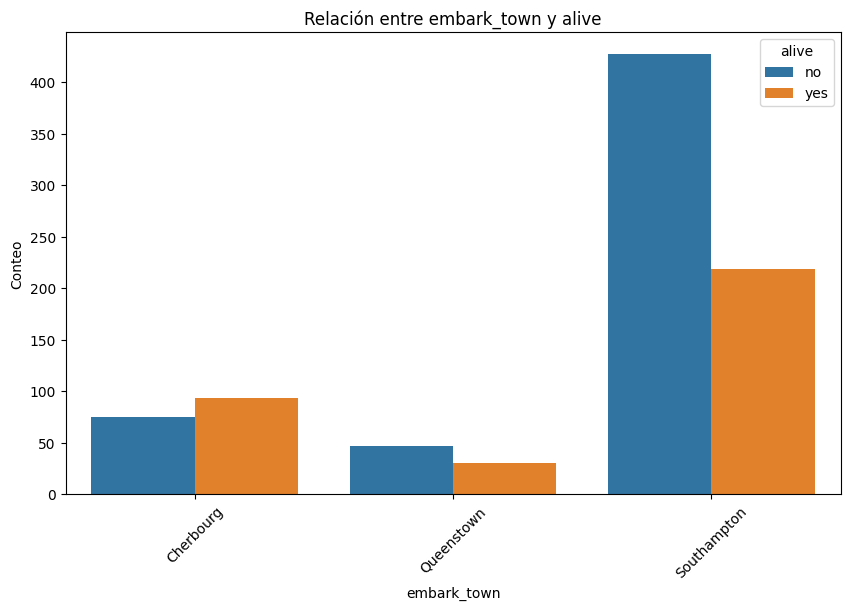

Frecuencias relativas de los supervivientes por puerto: en términos relativos sobrevivieron más de Cherbourg, el puerto donde embarcaron en su mayoría personas de primera clase


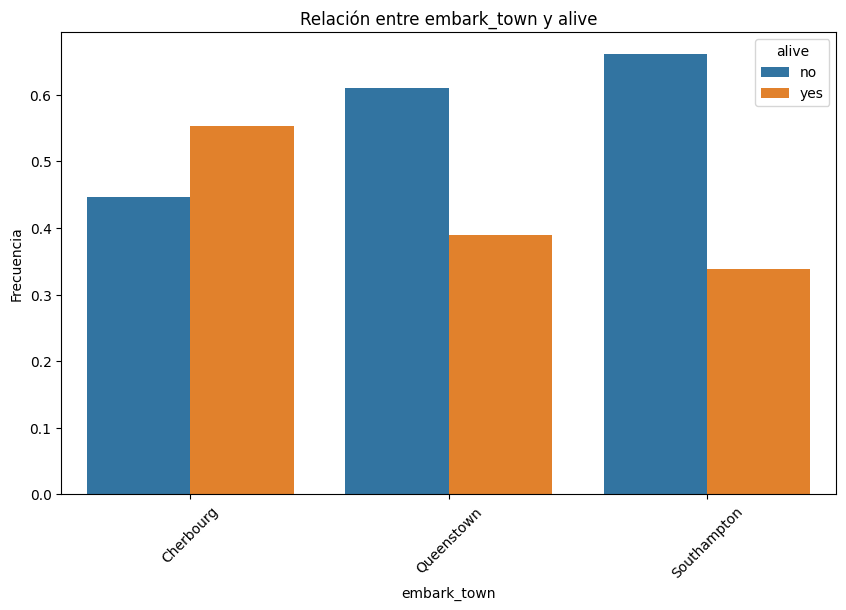

Relación estadística entre el  puerto y la supervivencia se observa que sobrevivieron más de puertos donde embarcaron personas de primera


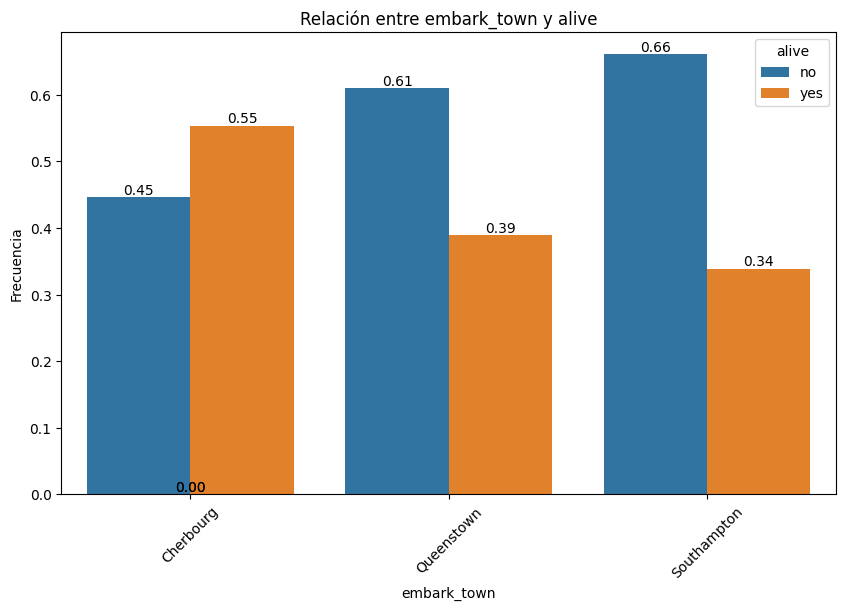

 ALIVE Y embarked_town el valor de p-value es alto implica que hay relación significativa:
Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


In [26]:
# 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

from bootcampviztools import plot_categorical_relationship_fin

print(f"Frecuencias absolutas de los supervivientes por puerto: en términos absolutos sobrevivieron más de Southampton, el mayoritario")
plot_categorical_relationship_fin(df_titanic_ajust, "embark_town", "alive", relative_freq=False, show_values=False, size_group = 5)


print(f"Frecuencias relativas de los supervivientes por puerto: en términos relativos sobrevivieron más de Cherbourg, el puerto donde embarcaron en su mayoría personas de primera clase")
plot_categorical_relationship_fin(df_titanic_ajust, "embark_town", "alive", relative_freq=True, show_values=False, size_group = 5)

print(f"Relación estadística entre el  puerto y la supervivencia se observa que sobrevivieron más de puertos donde embarcaron personas de primera")
plot_categorical_relationship_fin(df_titanic_ajust, "embark_town","alive", relative_freq = True, show_values = True)


tabla_contingencia = pd.crosstab(df_titanic_ajust['alive'], df_titanic_ajust['embark_town'])
tabla_contingencia
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print(f" ALIVE Y embarked_town el valor de p-value es alto implica que hay relación significativa:")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

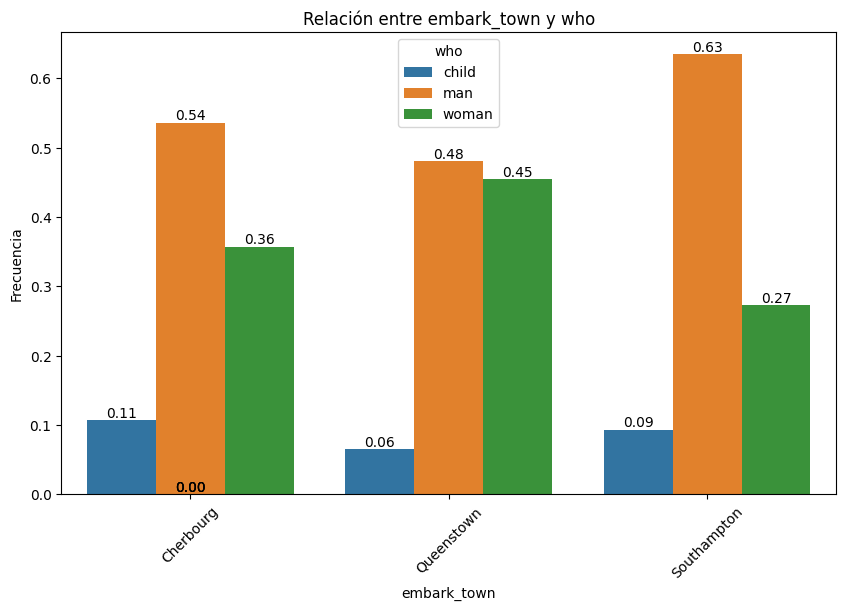

In [14]:
plot_categorical_relationship_fin(df_titanic_ajust,"embark_town","who", relative_freq=True, show_values=True)

In [13]:
df_titanic_ajust.groupby("embark_town", as_index= False)["alive"].value_counts()

,embark_town,alive,count
0,Cherbourg,yes,93
1,Cherbourg,no,75
2,Queenstown,no,47
3,Queenstown,yes,30
4,Southampton,no,427
5,Southampton,yes,219


In [15]:
# CORRECION PROFESOR EN CADA CLASE SE REVISAR WHO PARA DETERMINAR SI HUBO INFLUENCIA DE PUERTO CON WHO PARA SOBREVIVIR. DESPUES HARÍAMOS LO MISMO PARA LAS 9 COMBINACIONES DE WHO Y DE CLASS.
df_test= df_titanic_ajust.loc[(df_titanic_ajust.who=="man") & (df_titanic_ajust["class"]== "First")].copy()
plot_categorical_relationship_fin

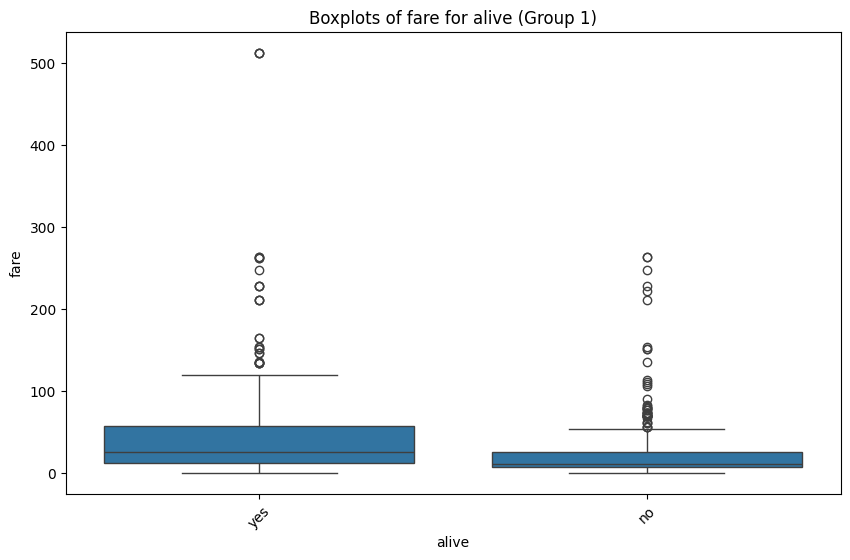

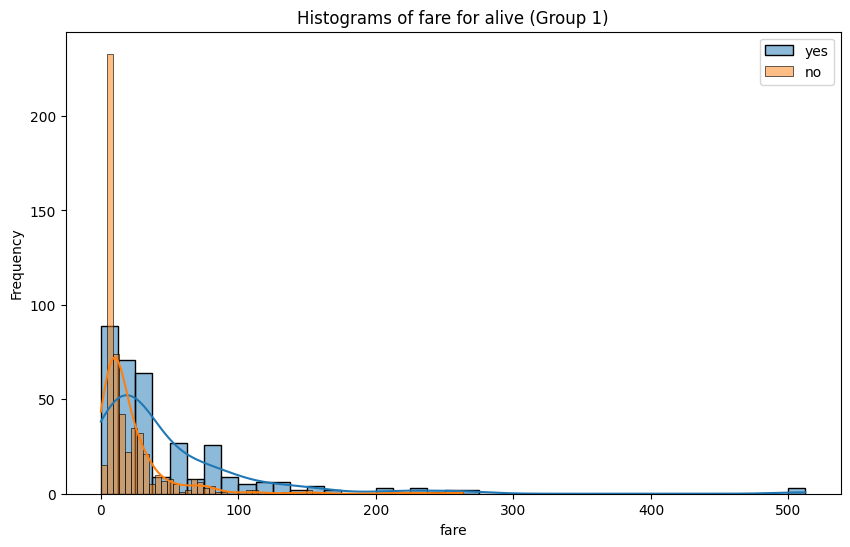

c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)


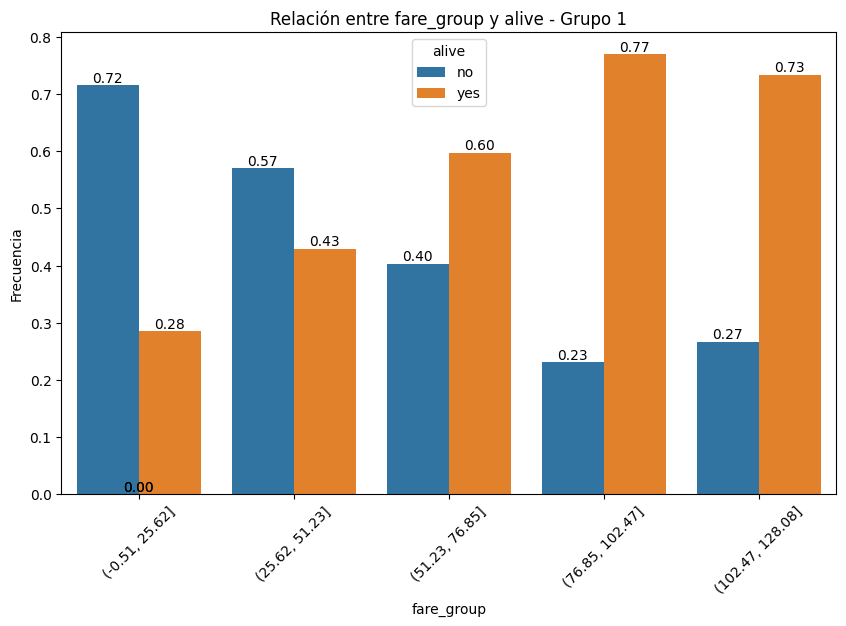

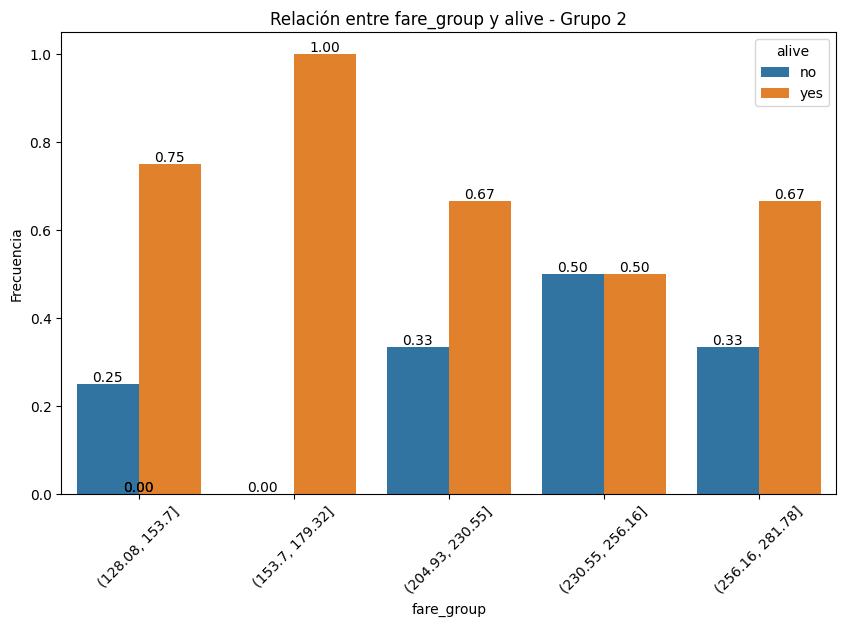

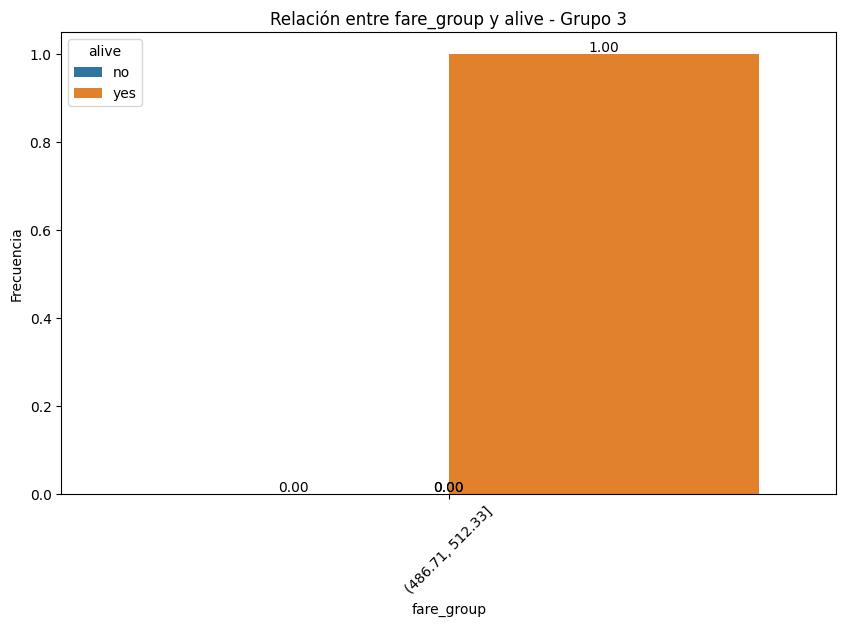

Frecuencias absolutas de los supervivientes por precio del billete: en términos absolutos sobrevivieron más de precios más altos


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


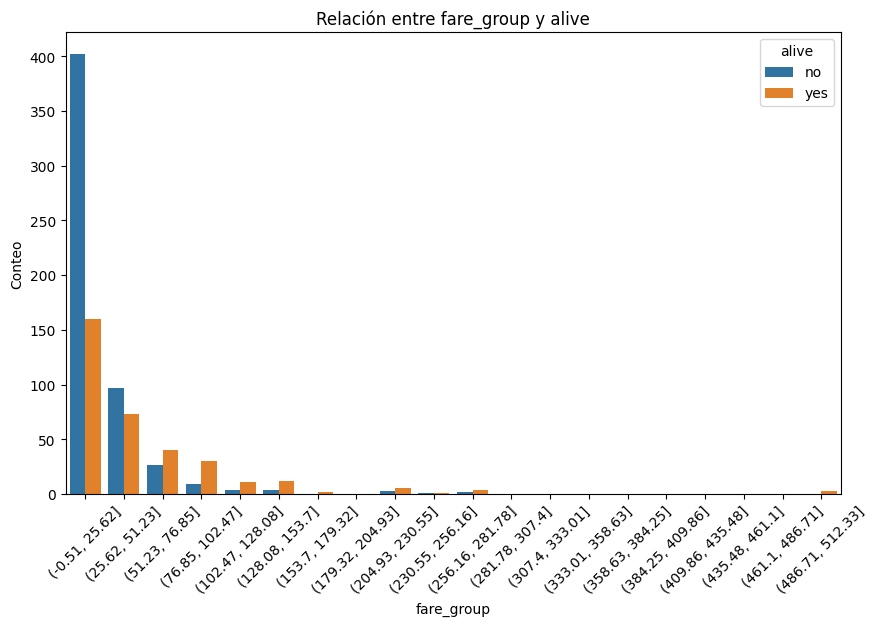

Frecuencias relativas de los supervivientes por precio del billete: en términos relativos sobrevivieron más de precios más altos


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)


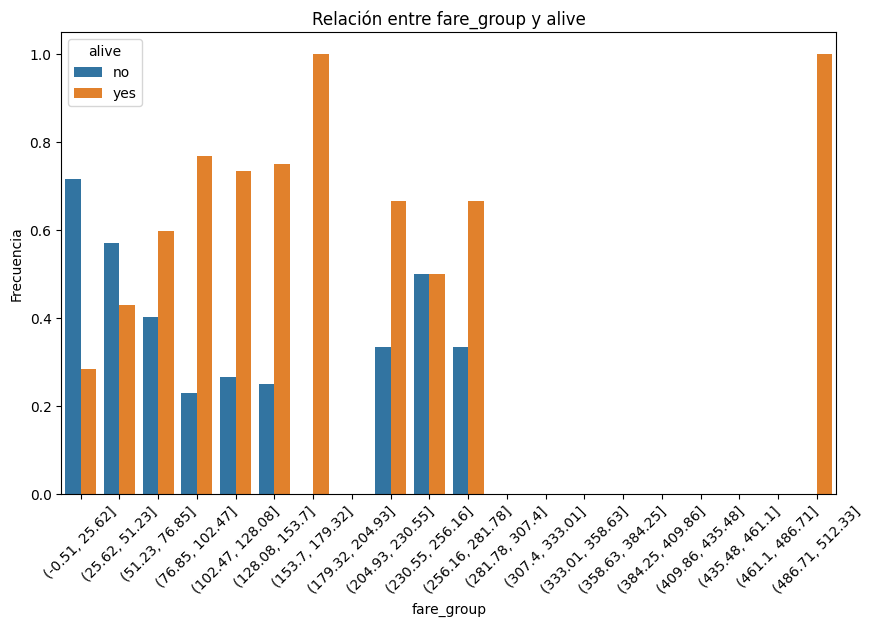

Relación estadística entre el  precio del billete y la supervivencia se observa que sobrevivieron más quien pasó más, que debería tratarse de personas de primera


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)


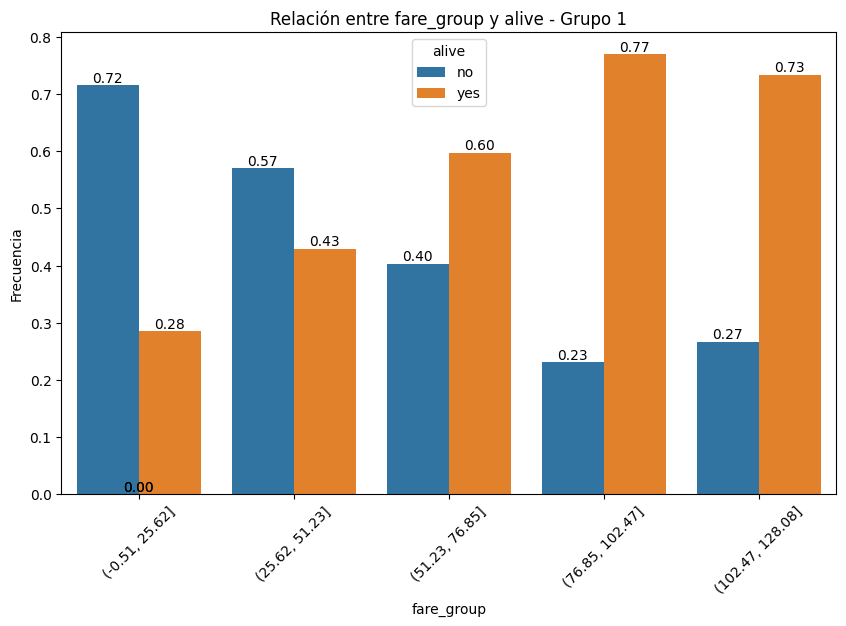

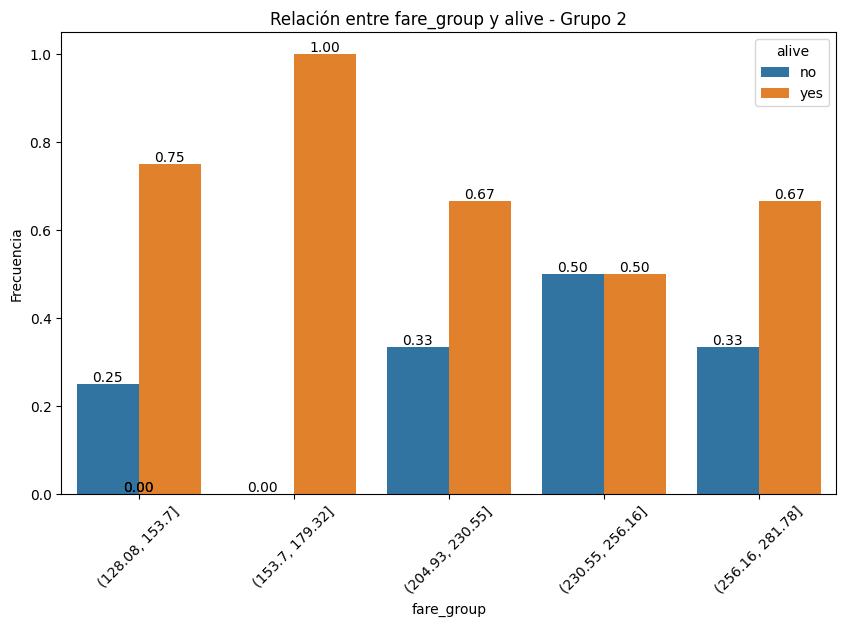

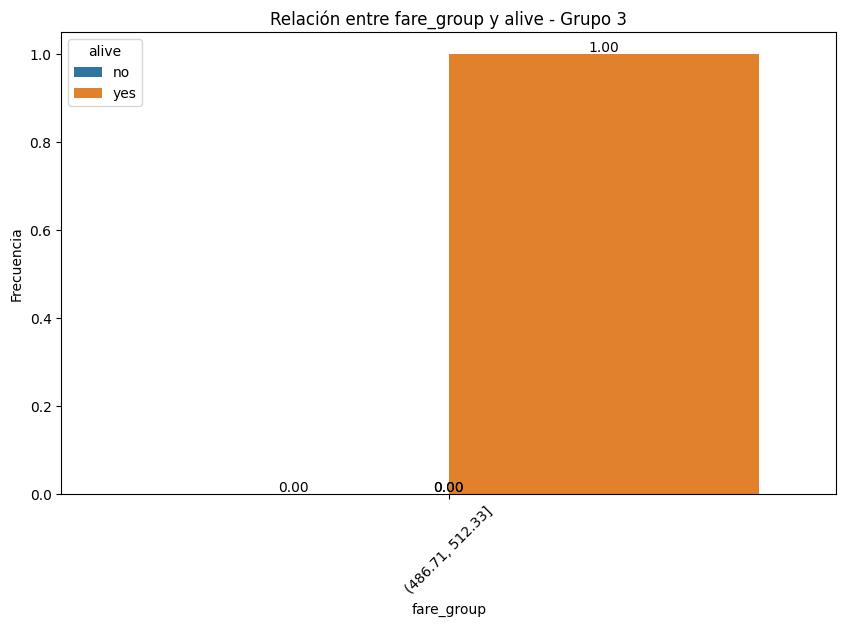

P value entre fare y alive es alto por lo que hay relación
Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [19]:
#4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

from bootcampviztools import plot_categorical_relationship_fin,plot_grouped_boxplots, plot_grouped_histograms
#corrección del profesor (esto y mannwhitneyu)
plot_grouped_boxplots(df_titanic_ajust,"alive","fare")
plot_grouped_histograms(df_titanic_ajust,"alive","fare", group_size=2)

# Agrupar los datos de "fare" en intervalos más grandes
import numpy as np
df_titanic_ajust['fare_group'] = pd.cut(df_titanic_ajust['fare'], bins=20, precision=2)


# Graficar la relación
plot_categorical_relationship_fin(df_titanic_ajust, "fare_group", "alive", relative_freq=True, show_values=True)


#Como no ha salido ordenado primero ordenamos el df por fare
df_titanic_ajust = df_titanic_ajust.sort_values(by='fare')


print(f"Frecuencias absolutas de los supervivientes por precio del billete: en términos absolutos sobrevivieron más de precios más altos")
plot_categorical_relationship_fin(df_titanic_ajust, "fare_group", "alive", relative_freq=False, show_values=False, size_group = 500)


print(f"Frecuencias relativas de los supervivientes por precio del billete: en términos relativos sobrevivieron más de precios más altos")
plot_categorical_relationship_fin(df_titanic_ajust, "fare_group", "alive", relative_freq=True, show_values=False, size_group = 500)

print(f"Relación estadística entre el  precio del billete y la supervivencia se observa que sobrevivieron más quien pasó más, que debería tratarse de personas de primera")
plot_categorical_relationship_fin(df_titanic_ajust, "fare_group","alive", relative_freq = True, show_values = True)


print(F"P value entre fare y alive es alto por lo que hay relación")
from scipy.stats import mannwhitneyu 
# Separamos por tipo de respuesta a alive
grupo_a = df_titanic_ajust.loc[df_titanic_ajust.alive == "yes"]["fare"]
grupo_b = df_titanic_ajust.loc[df_titanic_ajust.alive == "no"]["fare"]
# Aplicamos test
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)



La tarifa es mayor en clases de primera,etc


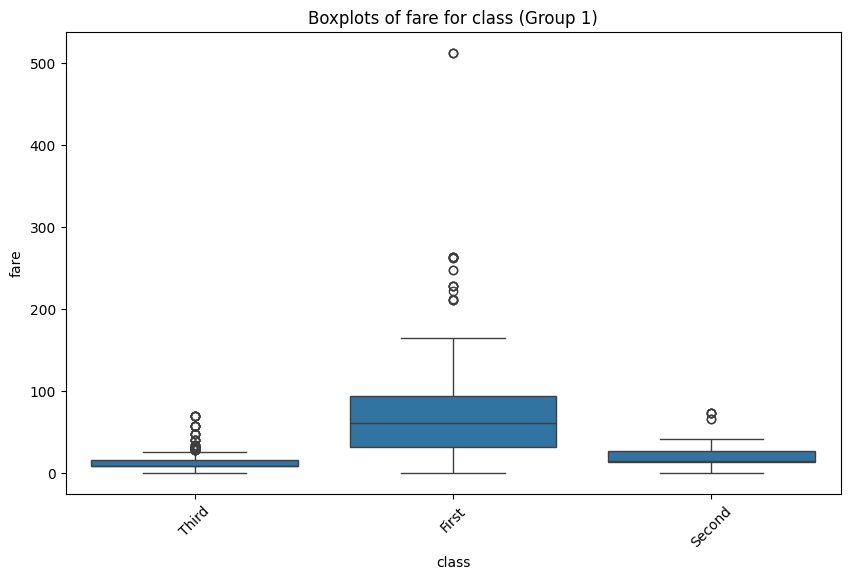

In [20]:
print(f"La tarifa es mayor en clases de primera,etc")
plot_grouped_boxplots(df_titanic_ajust,"class","fare")


In [ ]:
print(f"¿que influyó para salvarse, la fare o la clase?")
df_alive=df_titanic_ajust.loc[df_titanic_ajust.alive=="yes"].copy()
df_dead=df_titanic_ajust.loc[df_titanic_ajust.alive=="no"].copy()

plot_grouped_boxplots(df_alive,"fare")


In [22]:
#5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

#resolución del PROFESOR
df_titanic_ajust.loc[df_titanic_ajust.fare==0,"class"].value_counts()

print(f"los pasajeros que pagaron 0 creo que era la tripulación, son hombres que embarcaron en Southampton principalmente fueron en tercera y segunda y no sobrevivieron en su mayoría")
pasajero_mas_barato = df_titanic_ajust[df_titanic_ajust['fare'] == df_titanic_ajust['fare'].min()]
len(pasajero_mas_barato)
print(pasajero_mas_barato)



print(f"los pasajeros que pagaron más caro iban en primera eran hombres y mujeres de unos 35 años y sobrevivieron pagando 512")
pasajero_mas_caro = df_titanic_ajust[df_titanic_ajust['fare'] == df_titanic_ajust['fare'].max()]
print(pasajero_mas_caro)



los pasajeros que pagaron 0 creo que era la tripulación, son hombres que embarcaron en Southampton principalmente fueron en tercera y segunda y no sobrevivieron en su mayoría
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
815  male  29.699118   0.0   First  man        True  Southampton    no   True   
822  male  38.000000   0.0   First  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
806  male  39.000000   0.0   First  man        True  Southampton    no   True   
732  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   
413  male  29.6

Viendo el gráfico de caja de alive y fare, en los no supervivientes hay más valores anómalos en tarifas altas


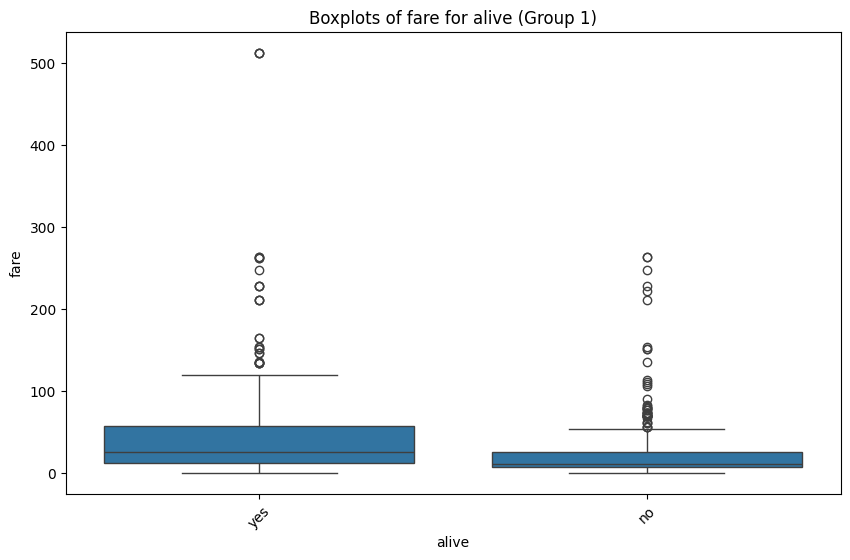

Viendo el gráfico de caja de fare y embark_town, hay más valores anómalos en Southampton


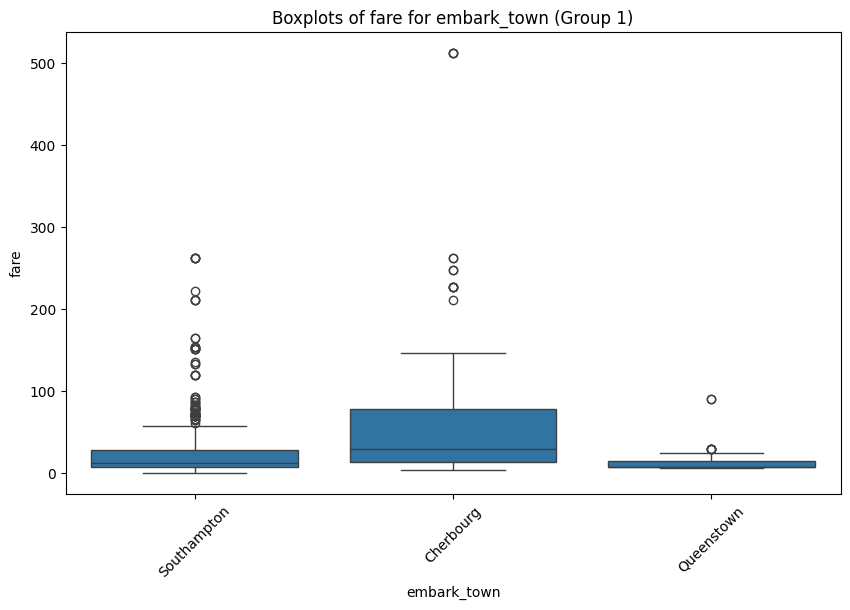

Análisis


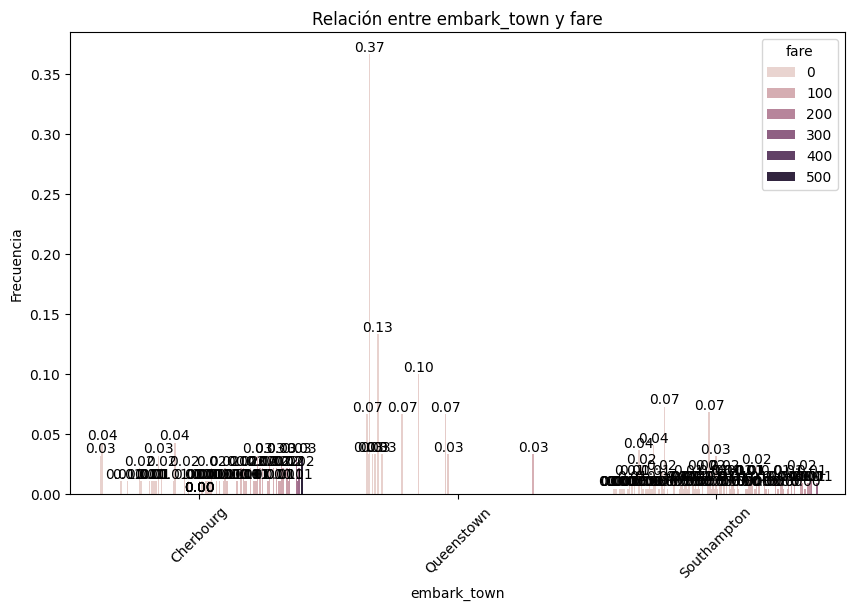

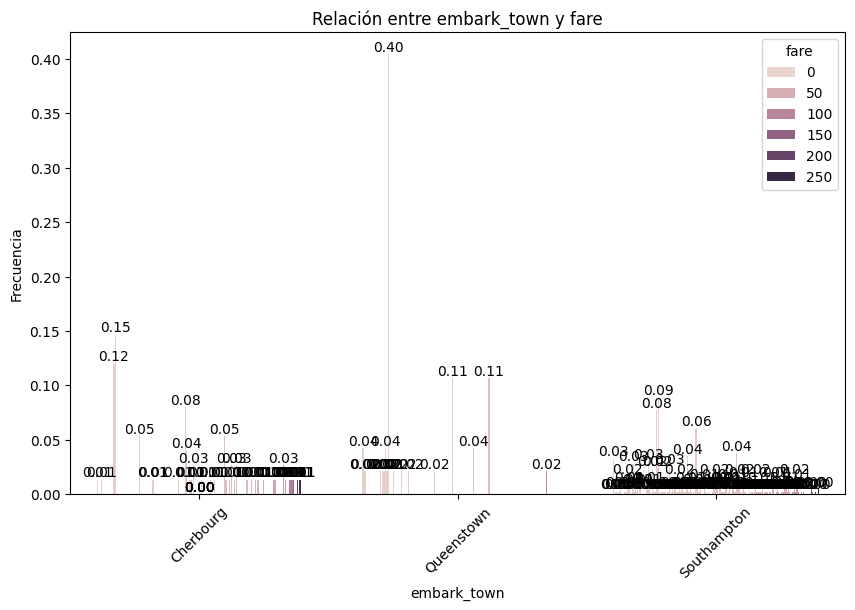

In [24]:
# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
#   ANALISIS TRIVARIABLE COPIAR FORMULA PARA ARCHIVO CON FORMULAS

from bootcampviztools import plot_grouped_boxplots,plot_categorical_relationship_fin,grafico_dispersion_con_correlacion
print(f"Viendo el gráfico de caja de alive y fare, en los no supervivientes hay más valores anómalos en tarifas altas")
plot_grouped_boxplots(df_titanic_ajust, "alive","fare")

print(f"Viendo el gráfico de caja de fare y embark_town, hay más valores anómalos en Southampton")
plot_grouped_boxplots(df_titanic_ajust, "embark_town","fare")


print(f"Análisis")
columnas = ["alive","fare","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic_ajust[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic_ajust.loc[df_titanic_ajust[col_directora] == valor,[col_2,col_1]] 


for valor,df_datos in diccionario_multivariante.items():
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)



In [ ]:
#SEGMENTAMOS LA DE EDAD
plot_combined_graphs(df_titanic_ajust,["age"])


In [38]:
#7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


tabla_contingencia = pd.crosstab(df_titanic_ajust['alive'], df_titanic_ajust['class'])
tabla_contingencia
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print(f" ALIVE Y CLASS el valor de p-value es alto implica que hay relación significativa:")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


print(f" ALIVE Y AGE el valor de p-value  es ligeraamente alto implica que  hay relación significativa:")
from scipy.stats import mannwhitneyu 
# Separamos por tipo de respuesta a alive
grupo_a = df_titanic_ajust.loc[df_titanic_ajust.alive == "yes"]["age"]
grupo_b = df_titanic_ajust.loc[df_titanic_ajust.alive == "no"]["age"]
# Aplicamos test
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)



 ALIVE Y CLASS el valor de p-value es alto implica que hay relación significativa:
Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]
 ALIVE Y AGE el valor de p-value  es ligeraamente alto implica que  hay relación significativa:
Estadístico U: 89538.0
Valor p: 0.24336668156689534


Respuesta yes:


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)


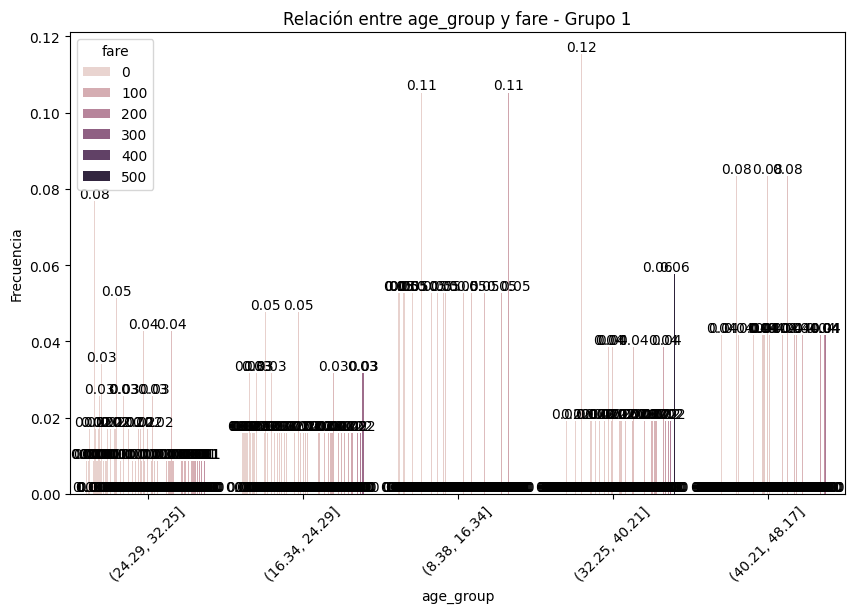

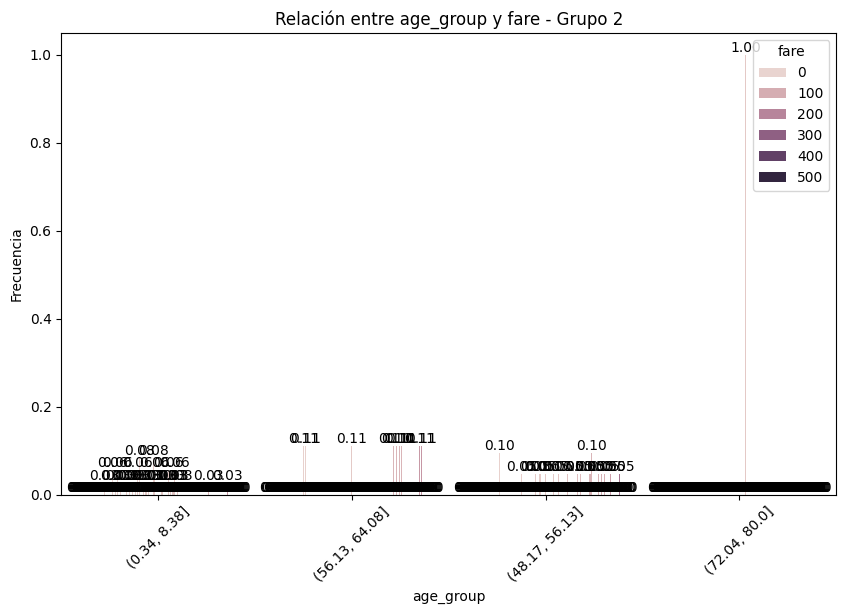

Respuesta no:


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


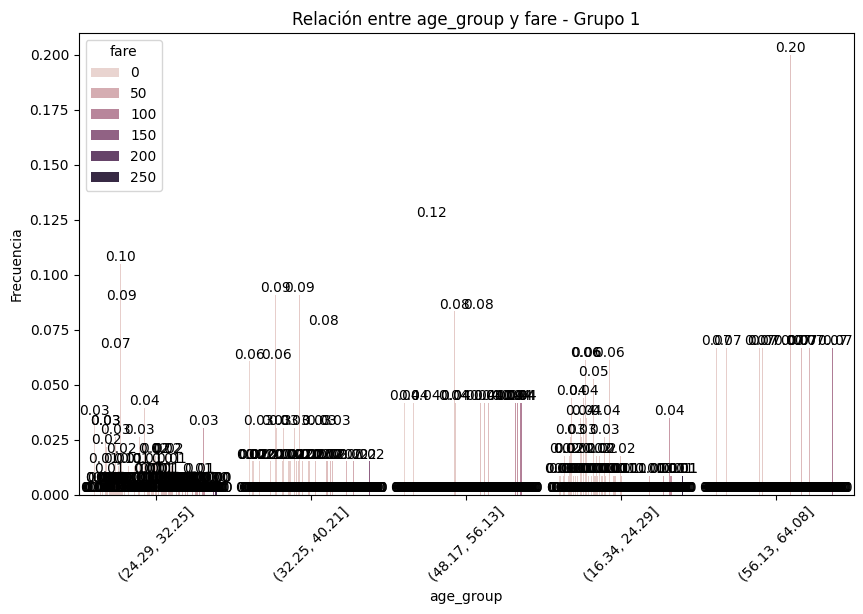

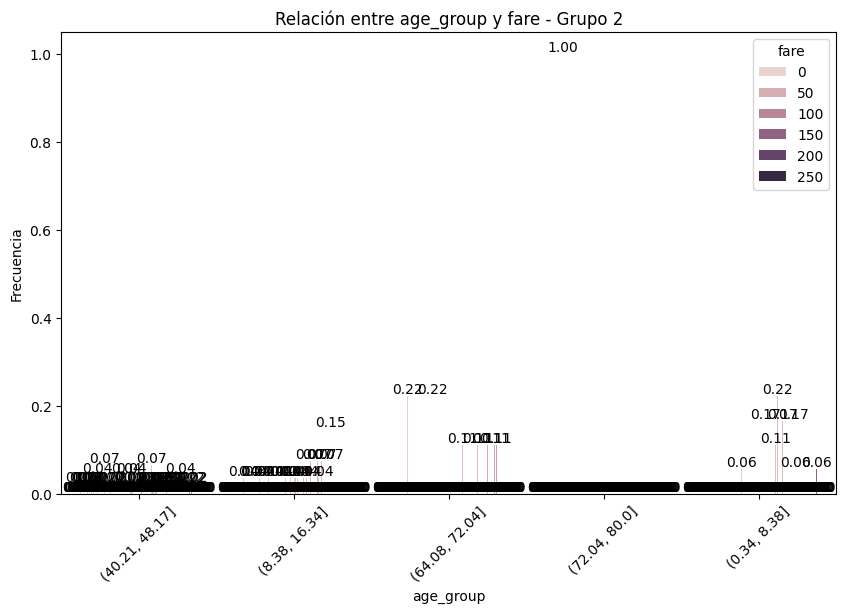

In [44]:
#8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?  Está contestado en la primera ¿?
df_titanic_ajust['age_group'] = pd.cut(df_titanic_ajust['age'], bins=10, precision=2)


columnas = ["alive","fare","age_group"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic_ajust[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic_ajust.loc[df_titanic_ajust[col_directora] == valor,[col_2,col_1]] 


for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

    


Respuesta alive yes:


ValueError: could not convert string to float: 'Southampton'

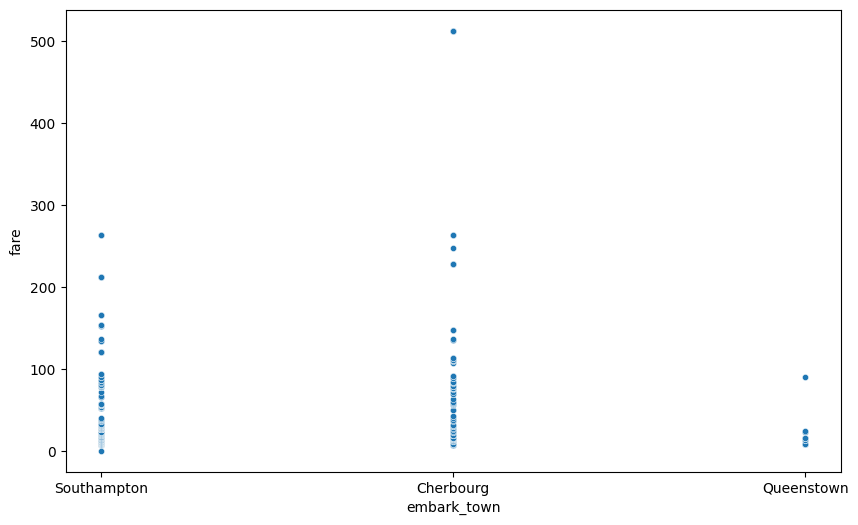

In [25]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta alive {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

In [3]:
# revisar de profesor la trivariante plot_categorical_relationship_fin(df_titanic,"who","class")

NameError: name 'plot_categorical_relationship_fin' is not defined

In [ ]:
df_titanic_ajust['fare_group'] = pd.cut(df_titanic_ajust['fare'], bins=20, precision=2)


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

Distribución Air company


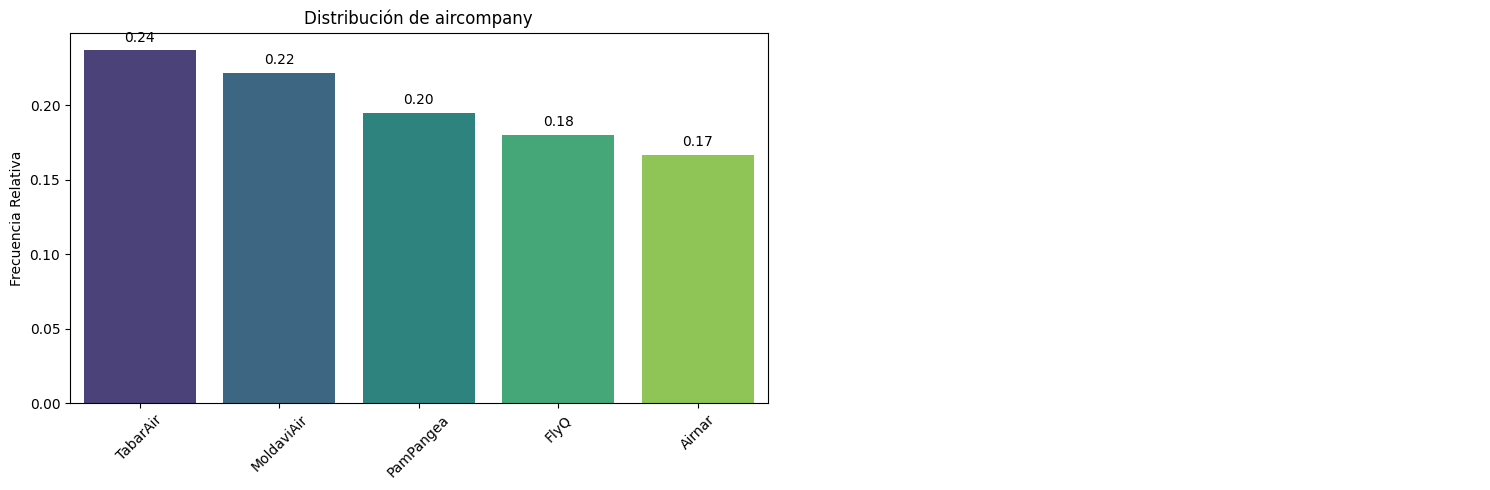

Detalle por ingresos
(2,)


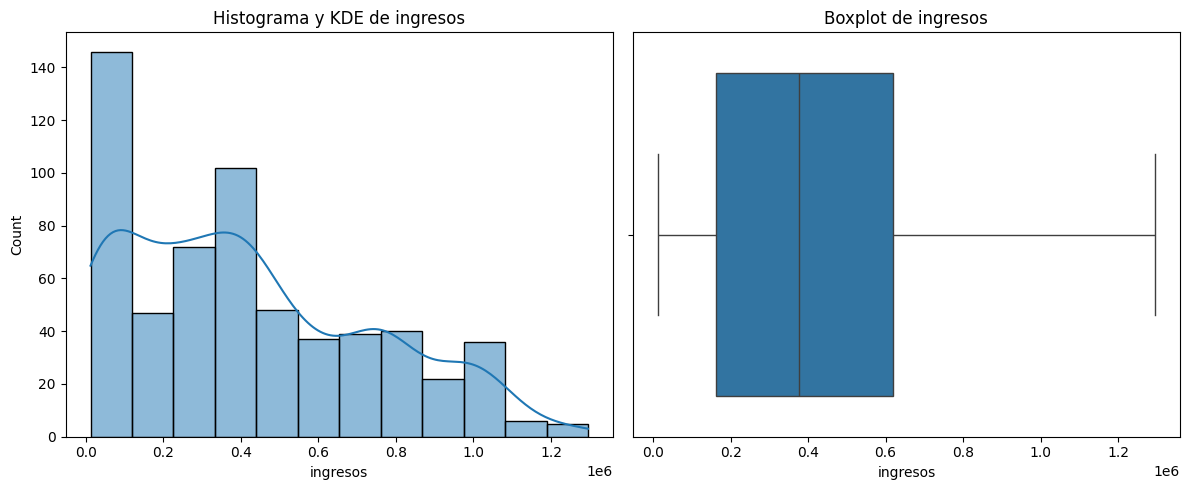

Histogramas por ingresos y air company: ingresos cambian en función de la compañía y Tabair obtiene menos ingresos que otras compañías para la cantidad de vuelos que tiene


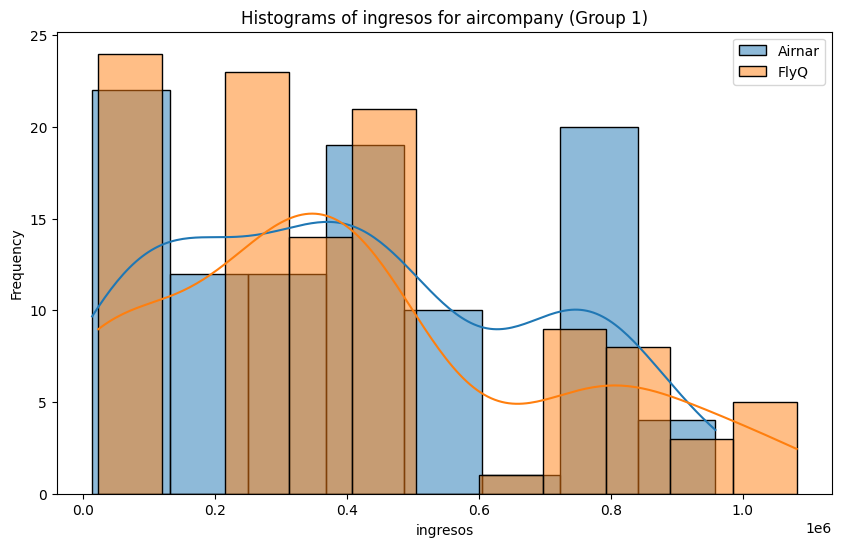

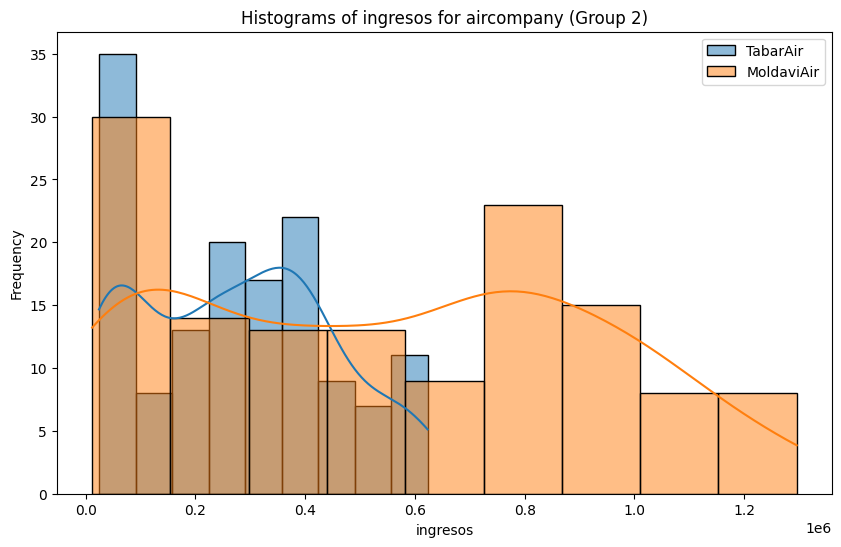

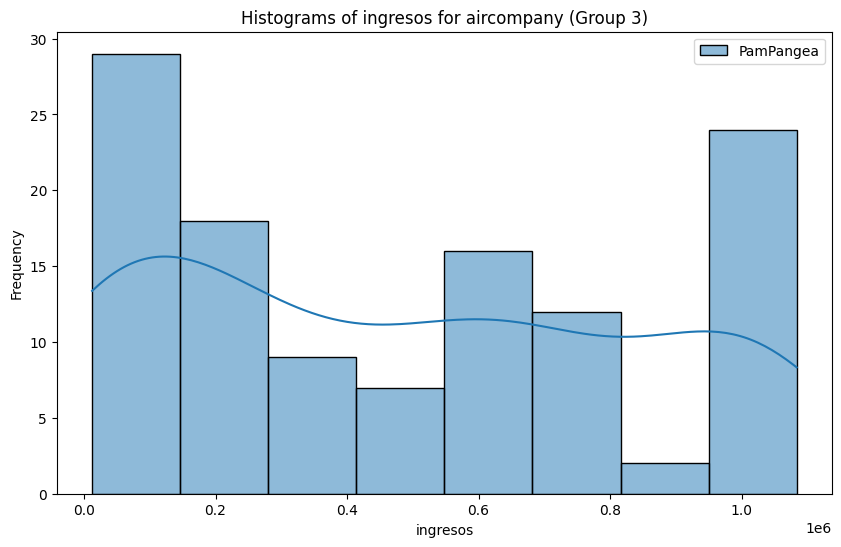

añadido por el proffesor


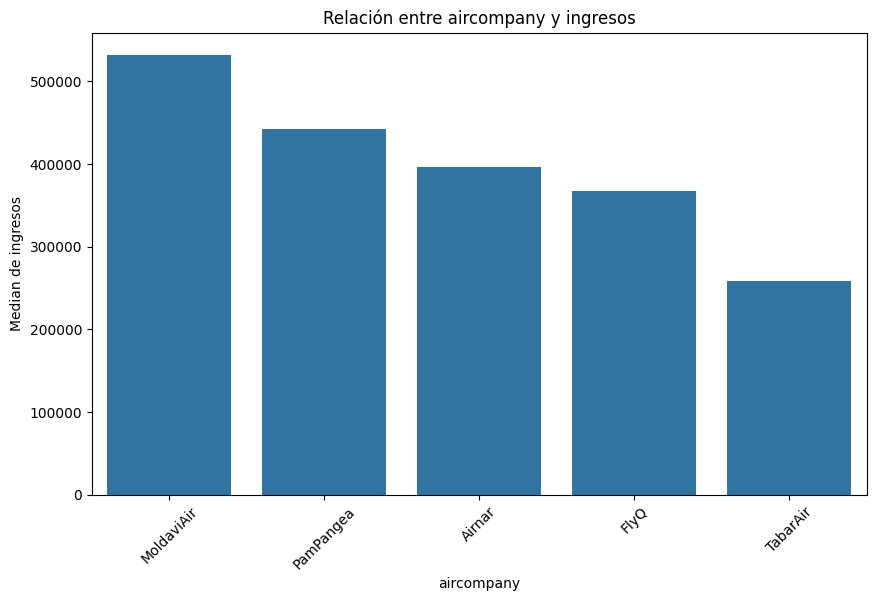

In [27]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms

print(f"Distribución Air company")
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores=True)

print(f"Detalle por ingresos")
plot_combined_graphs(df_air_jun, ["ingresos"])

print(f"Histogramas por ingresos y air company: ingresos cambian en función de la compañía y Tabair obtiene menos ingresos que otras compañías para la cantidad de vuelos que tiene")
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

print(f"añadido por el proffesor")
plot_categorical_numerical_relationship(df_air_jun,"aircompany","ingresos",measure="median")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

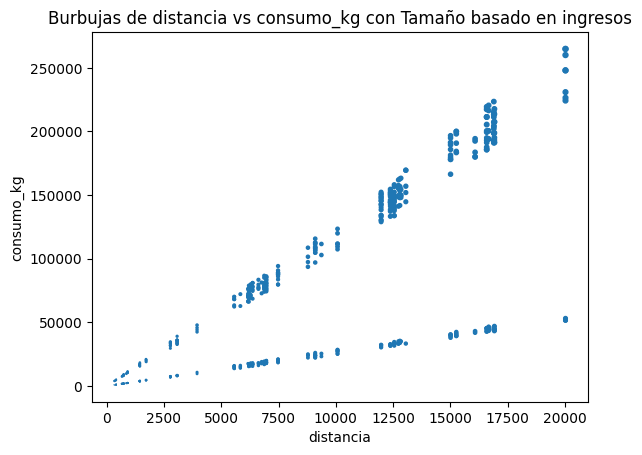

consumos similares, es eficiente , por lo que es valorable que la cia aérea valore más sobre otras rutas que son eficientes y generan más ticket medio


In [45]:
from bootcampviztools import bubble_plot
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)
print(f"consumos similares, es eficiente , por lo que es valorable que la cia aérea valore más sobre otras rutas que son eficientes y generan más ticket medio")

In [ ]:
#pero existen dos curvas, una más eficiente
plot_combined_graphs(df_air_jun,[])

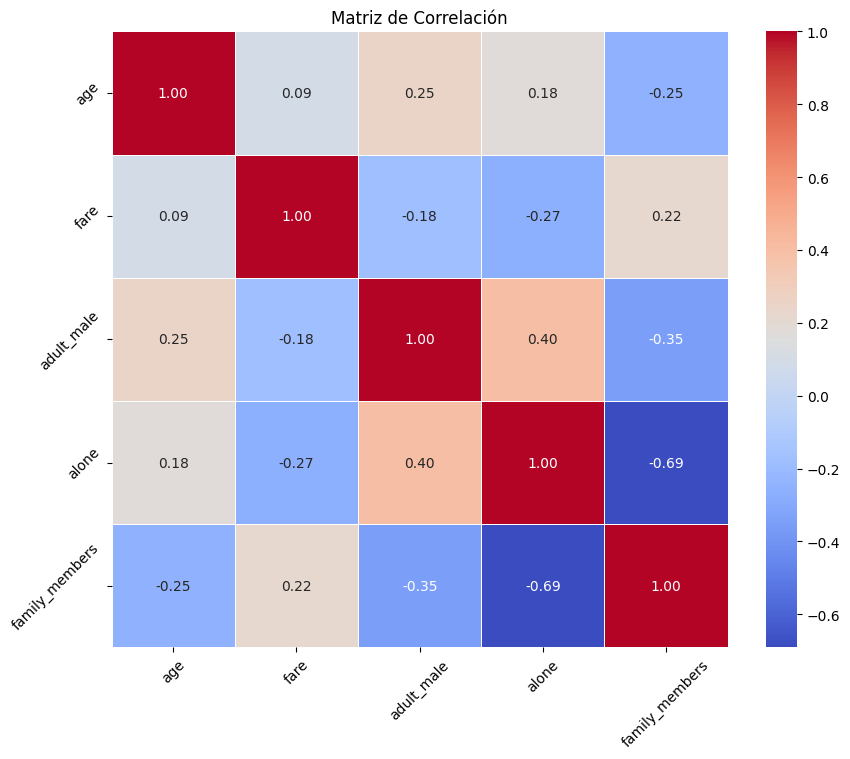

In [53]:
corr_matrix = df_titanic_ajust.corr(numeric_only= True) 
corr_matrix

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) 

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  

plt.show()


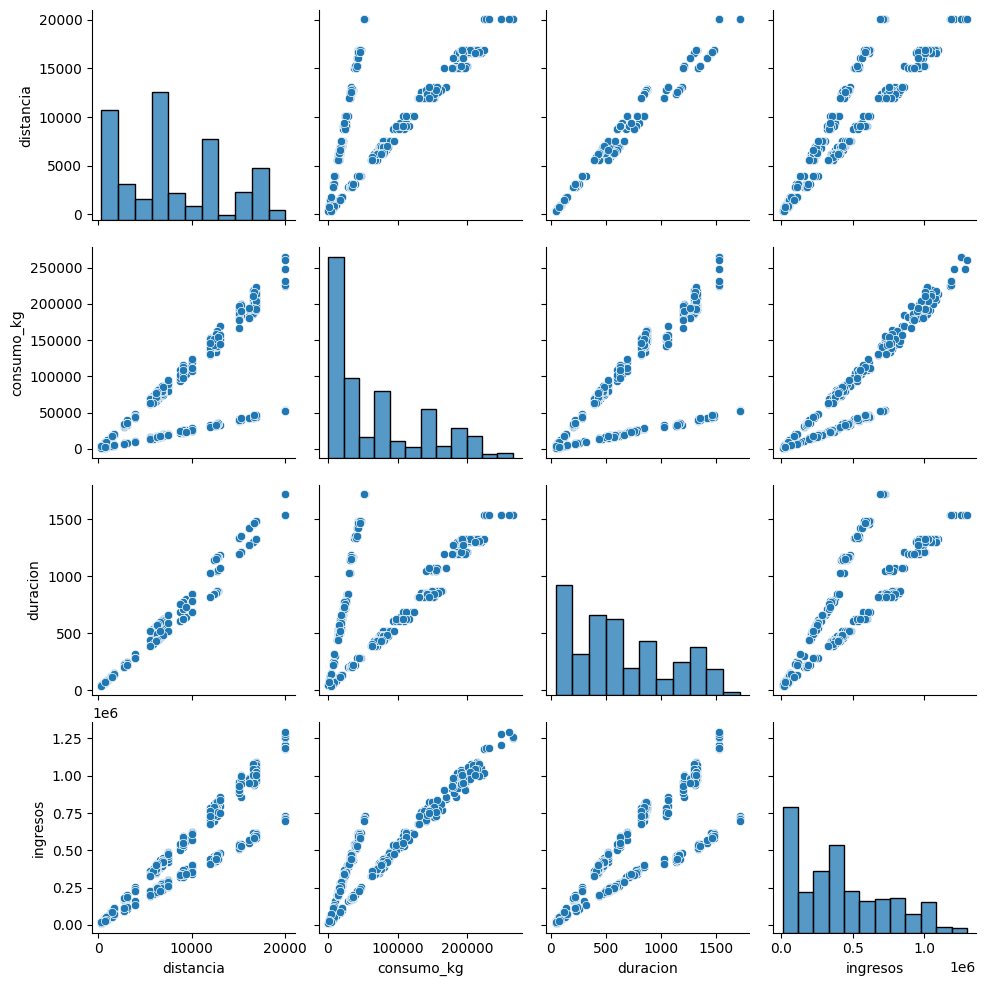

In [54]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

sns.pairplot(df_solo_numeros)
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [46]:
# Calcula los cuartiles de la columna "distancia"
cuartiles = df_air_jun['distancia'].quantile([0, 0.25, 0.5, 0.75, 1])

# Define los rangos de las categorías
categorias = ['Corta', 'Media', 'Larga']
rangos = [cuartiles[0], cuartiles[0.25], cuartiles[0.75], cuartiles[1]]

# Crea la variable categórica "cat_vuelo" basada en los rangos
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=rangos, labels=categorias)
df_air_jun.head(3)




,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corta
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Larga
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Media


Respuesta Corta:


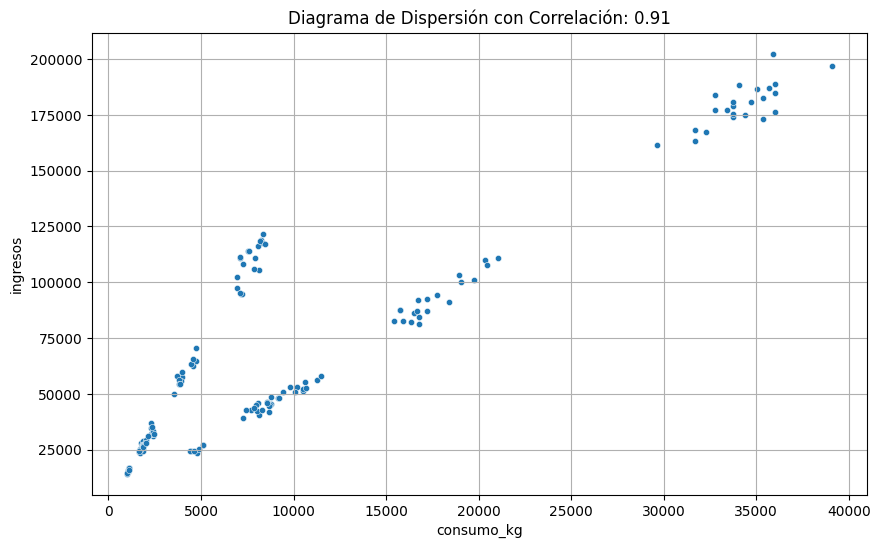

Respuesta Larga:


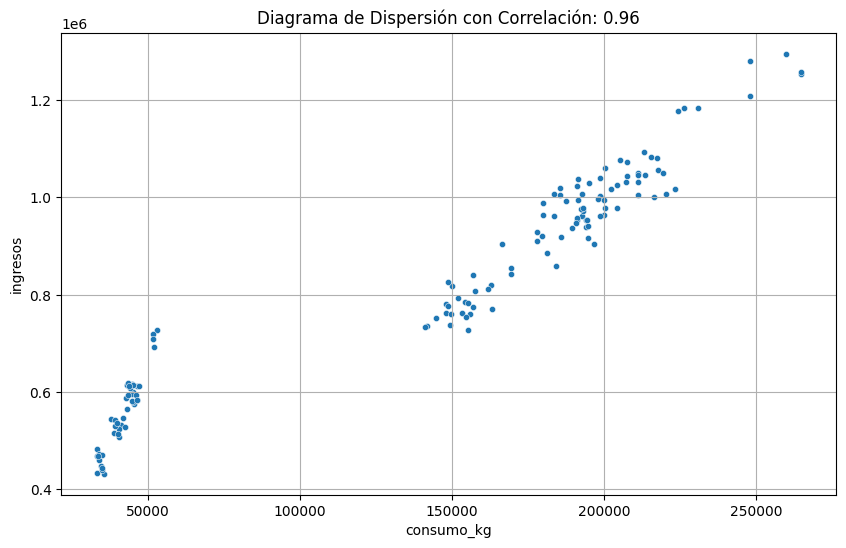

Respuesta Media:


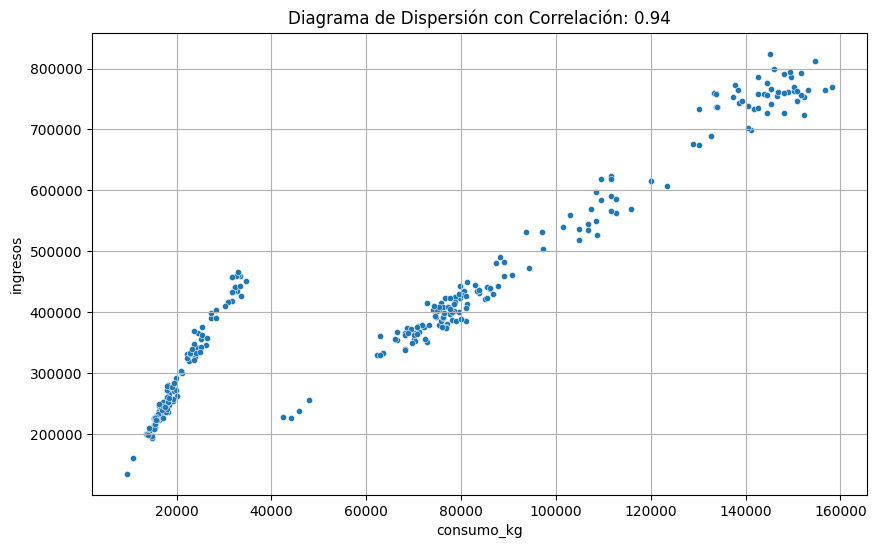

Respuesta nan:


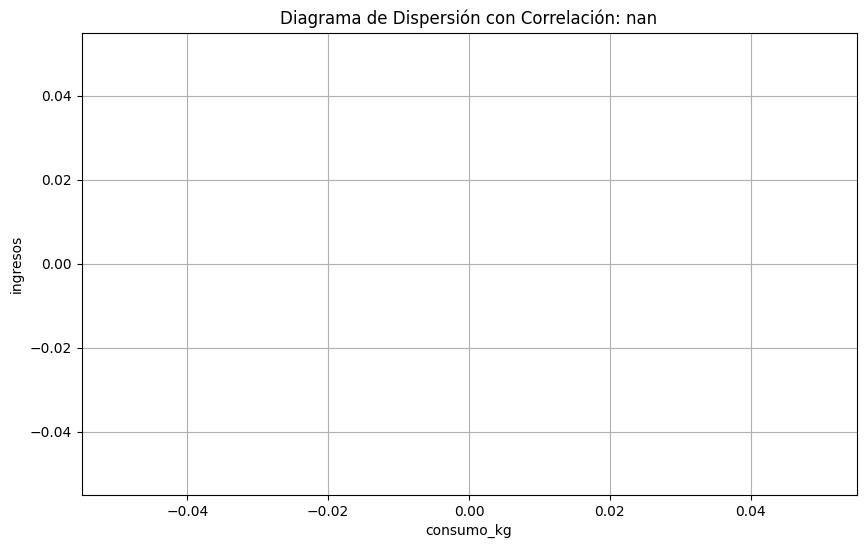

In [61]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]



for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.